# Jonathan Halverson
# Monday, April 11, 2016
# Iris and XOR with SVM

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

(0, 3)

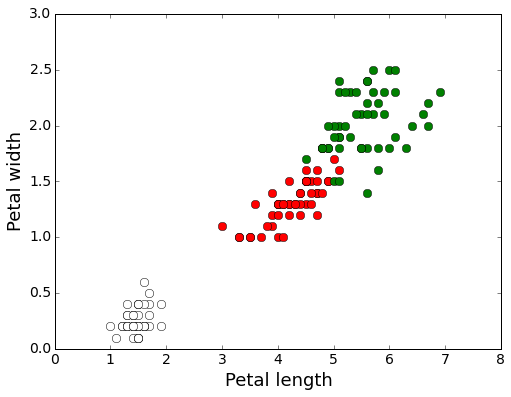

In [48]:
plt.plot(X[:50,0], X[:50,1], 'wo')
plt.plot(X[50:100,0], X[50:100,1], 'ro')
plt.plot(X[100:,0], X[100:,1], 'go')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(0, 8)
plt.ylim(0, 3)

In [49]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_std = stdsc.transform(X)

In [66]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

param_grid = dict(C=np.logspace(-3, 2, base=10))
grid = GridSearchCV(estimator=SVC(kernel='linear'), param_grid=param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_std, y_train)
print grid.best_score_
print grid.best_params_

0.973214285714
{'C': 0.068664884500430012}


In [67]:
svm = SVC(kernel='linear', C=grid.best_params_['C'])
svm.fit(X_train_std, y_train)

SVC(C=0.068664884500430012, cache_size=200, class_weight=None, coef0=0.0,
  degree=3, gamma=0.0, kernel='linear', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

C is the penalty parameter of the error term. Next we evaluate the accuracy of the model on the test data:

In [69]:
svm.score(X_test_std, y_test)

0.94736842105263153

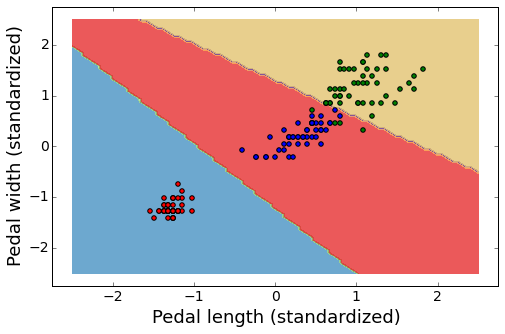

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

# decision boundary plot
x_min, x_max = -2.5, 2.5
y_min, y_max = -2.5, 2.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=100), np.linspace(y_min, y_max, num=100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
ax.set_xlabel("Pedal length (standardized)")
ax.set_ylabel("Pedal width (standardized)")

# original data
colors = ['red', 'blue', 'green']
for idx, cls in enumerate(np.unique(y)):
    ax.scatter(x=X_std[y == cls, 0], y=X_std[y == cls, 1], marker='o', c=colors[idx])

### Nonlinear domains